# K-Nearest Neighbors 

<div class = 'alert alert-warning'>
    <a href = 'https://towardsdatascience.com/k-nearest-neighbors-knn-explained-cbc31849a7e3'> Link to Referred Article</a>
</div>

The value of a data point is determined by the data points around it.

- If you have one very close friend and spend most of your time with him/her, you will end up sharing similar interests and enjoying same things. That is kNN with k=1.

- If you always hang out with a group of 5, each one in the group has an effect on your behavior and you will end up being the average of 5. That is kNN with k=5.

- k = very low ==> Overfitted model

- k = very large ==> Underfitted model (classes with quite a few samples would always be out voted by other bigger classes)

- **NEAREST NEIGHBORS ARE DETERMINED BY `EUCLIDEAN DISTANCE`**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs # creation of synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # KNN CLASSIFIER
from sklearn.model_selection import train_test_split

**NOTE**:
KNN can be used as both Classification Algorithm and Regression Algorithm.

In [9]:
# create a synthetic (fake) dataset

X, y = make_blobs(n_samples = 100,
                 n_features = 2,
                 centers = 4,
                 cluster_std = 1.5,
                 random_state = 4)

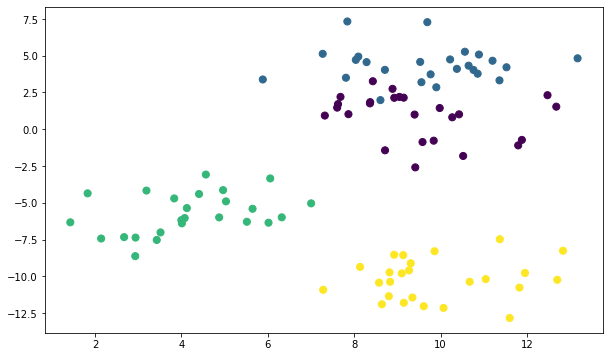

In [10]:
# Plotting the dataset

plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c = y, marker = 'o', s=50)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)


<br><br>
>Then we create a kNN classifier object. To show the difference between the importance of k value, I create two classifiers with k values 1 and 5. Then these models are trained using train set. n_neighbors parameter is used to select k value. Default value is 5 so it does not have to be explicitly written.
<br><br>


In [12]:
knn5 = KNeighborsClassifier() # k=5
knn1 = KNeighborsClassifier(n_neighbors = 1) # k=1

In [13]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy Score for KNN with K=5:', accuracy_score(y_test, y_pred_5))
print('Accuracy Score for KNN with K=1:', accuracy_score(y_test, y_pred_1))

Accuracy Score for KNN with K=5: 0.92
Accuracy Score for KNN with K=1: 0.92


<br><br>
The result seems to be very similar because we used a substantially small dataset. However, even on small datasets, different k values predict some points differently.
<br><br>

## Visualising All the predictions

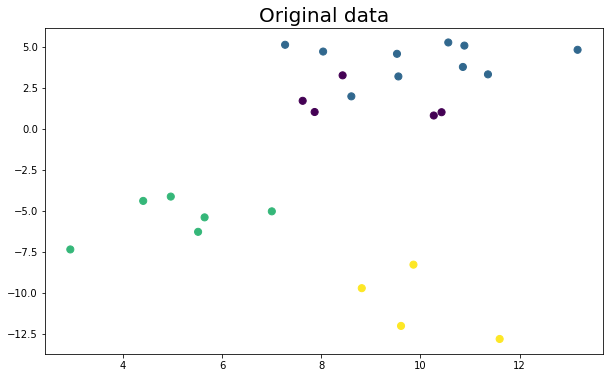

In [18]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=50)
plt.title("Original data", fontsize=20)
plt.show()

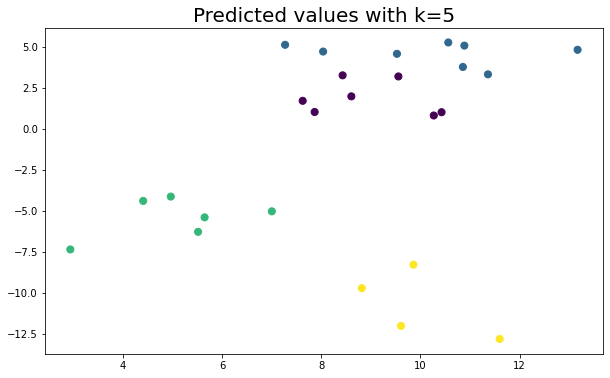

In [19]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker='o', s=50)
plt.title('Predicted values with k=5', fontsize=20)
plt.show()

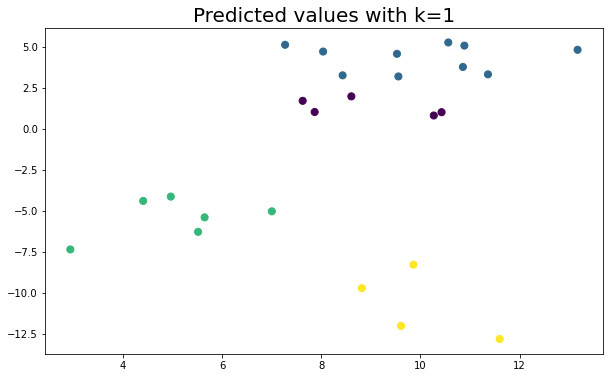

In [20]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker='o', s=50)
plt.title('Predicted values with k=1', fontsize=20)
plt.show()

# Selection of Best Values of `K` using `GridSearchCV`

Let's use the `breast_cancer` dataset of scikit-learn to follow up

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [22]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True, as_frame = True)

In [23]:
X_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
y_cancer.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [25]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                       param_grid = {'n_neighbors': np.arange(1,20)}, cv=5)

# param_grid -> parameters for which the estimator's
# value is to be checked


In [26]:
knn_grid.fit(X_cancer, y_cancer)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

<br><br>
We do not need to split the the datasets because cv parameter splits the dataset. The default value for cv parameter is 5 but I explicitly wrote it to emphasize why we don’t need to use train_test_split.
<br><br>

In [28]:
# Checking the best parameter value:

knn_grid.best_params_

{'n_neighbors': 13}

### Pros and cons of k-Nearest-Neigbors

#### Pros

- Simple and easy to interpret
- Does not make any assumption so it can be implemented in non-linear tasks.
- Works well on classification with multiple classes
- Works on both classification and regression tasks


#### Cons

- Becomes very slow as the number of data points increases because the model needs to store all data points.
- Not memory efficient
- Sensitive to outliers. Outliers also have a vote!